In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_cnb_15=pd.read_csv('processed_data/accuracy_NB_15.csv',index_col=False)
df_cnb_5=pd.read_csv('processed_data/accuracy_NB_5.csv',index_col=False)

In [30]:
df_cnb_5.drop(columns=df_cnb_5.columns[0], inplace=True)
df_cnb_5

,Error_metric,Train,Test,No_features
0,Accuracy,0.566667,0.588542,50
1,Precision,0.591837,0.656166,50
2,Recall,0.566667,0.588542,50
3,Accuracy,0.706870,0.669271,150
4,Precision,0.712546,0.724575,150
5,Recall,0.706870,0.669271,150
6,Accuracy,0.726087,0.716146,200
7,Precision,0.729283,0.747639,200
8,Recall,0.726087,0.716146,200
9,Accuracy,0.795455,0.781250,300


NameError: name 'colors' is not defined

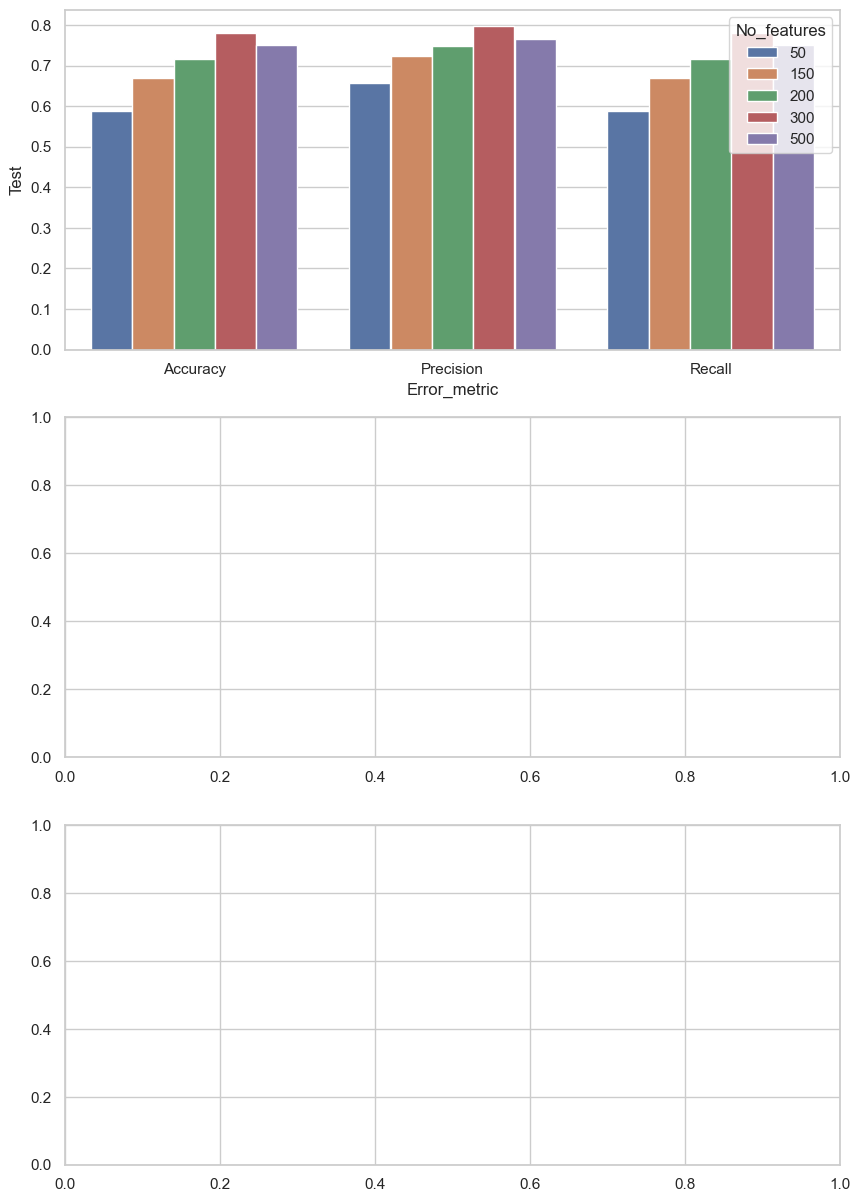

In [42]:
fif, ax= plt.subplots(nrows=3,ncols=1, figsize=(10,15))
sns.barplot(data=df_cnb_5, x= 'Error_metric', y='Test', hue='No_features',ax=ax[0])
sns.barplot(data=df_cnb_5, x= 'Error_metric', y='Train', hue='No_features',ax=ax[0], color=colors)

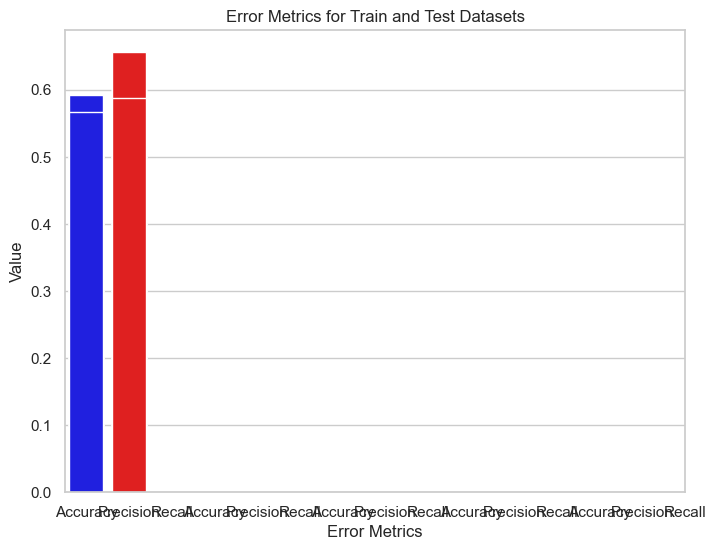

In [45]:
df = df_cnb_5.set_index("Error_metric")

# create the bar plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
colors = [(0, 0, 1,1), (1, 0, 0,1)]
# loop through each error metric and plot the values for the "train" and "test" datasets side by side
for i, errormetric in enumerate(df.index):
    train_value = df.loc[errormetric, "Train"].values[0]
    test_value = df.loc[errormetric, "Test"].values[0]
    sns.barplot(x=[i-0.2, i+0.2], y=[train_value, test_value], ax=ax, palette=colors)
    
# set the x-axis labels and tick positions
ax.set_xlabel("Error Metrics")
ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index)
    
# set the y-axis label and title
ax.set_ylabel("Value")
ax.set_title("Error Metrics for Train and Test Datasets")

plt.show()

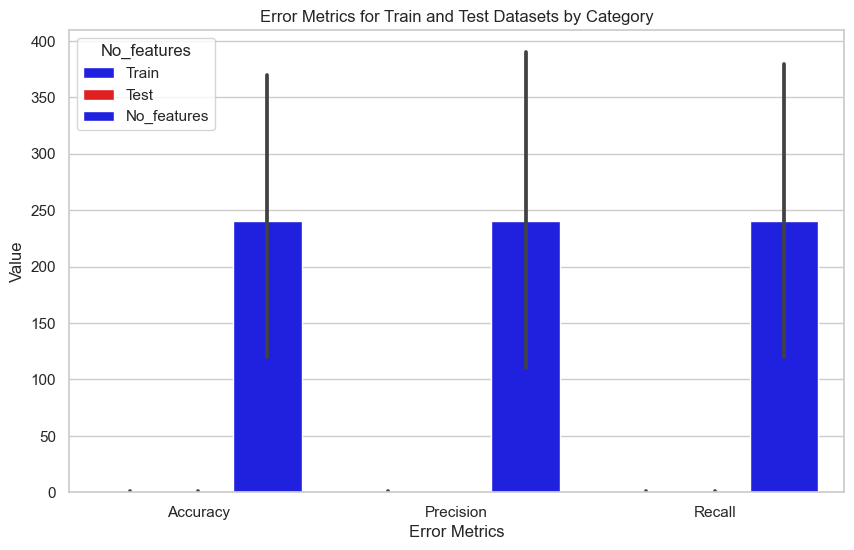

In [47]:
df = df_cnb_5.set_index("Error_metric")

# define the color sequence as a list of RGB or RGBA tuples
colors = [(0, 0, 1), (1, 0, 0)]

# create the bar plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# melt the dataframe to convert the "Train" and "Test" columns into a "Dataset" column
# and a "Value" column, which we can use for grouping by category with the "hue" parameter
melted_df = df.reset_index().melt(id_vars=["Error_metric"], var_name="No_features", value_name="Value")

# use the "hue" parameter to group the bars by category (Accuracy or Precision) and by dataset (Train or Test)
sns.barplot(x="Error_metric", y="Value", hue="No_features", data=melted_df, palette=colors)

# set the x-axis labels and tick positions
ax.set_xlabel("Error Metrics")
#ax.set_xticklabels(df.index, rotation=45, ha="right")
    
# set the y-axis label and title
ax.set_ylabel("Value")
ax.set_title("Error Metrics for Train and Test Datasets by Category")

plt.show()


TypeError: unhashable type: 'numpy.ndarray'

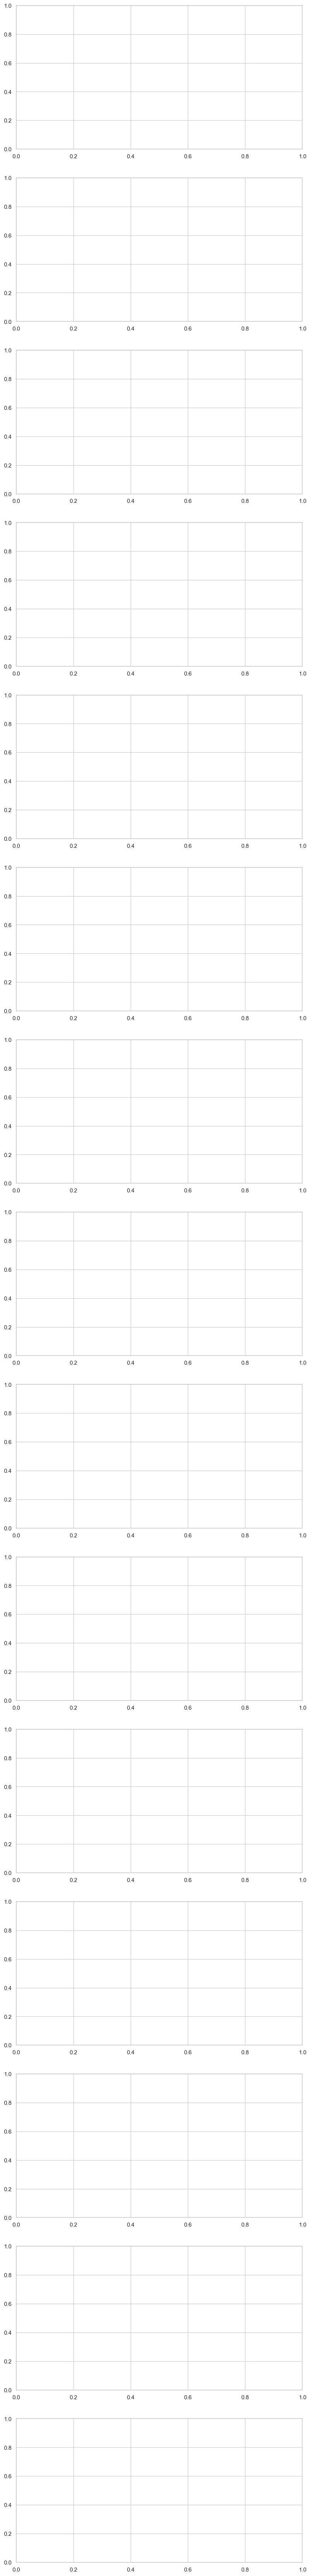

In [50]:
df = df_cnb_5.set_index("Error_metric")

# define the color sequence as a list of RGB or RGBA tuples
colors = [(0, 0, 1), (1, 0, 0)]

# create the bar charts for each error metric
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(df.index), ncols=1, figsize=(10, 6*len(df.index)))

for i, errormetric in enumerate(df.index):
    # create a separate subplot for each error metric
    ax = axes[i]
    
    # get the train and test values for the current error metric
    train_value = df.loc[errormetric, "Train"].values
    test_value = df.loc[errormetric, "Test"].values
    
    # create the bar chart with alternating bars for the train and test values
    sns.barplot(x=[0, 1], y=[train_value, test_value], ax=ax, palette=colors)
    ax.set_xticklabels(["Train", "Test"])
    
    # set the y-axis label and title for the subplot
    ax.set_ylabel("Value")
    ax.set_title(f"{errormetric} Error Metric for Train and Test Datasets")

plt.tight_layout()
plt.show()
